#Breast cancer detection using CNN in python. 

Based on the tutorial in link: https://www.youtube.com/watch?v=Y6UDeGRyNZk

In [1]:
!pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#load breast cancer data
cancer = datasets.load_breast_cancer()

In [18]:
#print description of dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
#converting the data into a dataframe

X = pd.DataFrame(data= cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
#list of target in data
y = cancer.target

In [21]:
# Categories associated with target in data
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
 #determine the shape of X
 X.shape

(569, 30)

In [34]:
#splitting the data. Stratify splits the data symmetrically between X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0, stratify=y) 

In [35]:
X_train.shape

(455, 30)

In [36]:
X_test.shape

(114, 30)

In [37]:
#Since the data is spread out over a large range we need to standardize it.
#This will conver the data into numpy arrays.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [38]:
#converting the 2D vectors procured in train test split into 3D vectors as accepted by the CNN.
#Since the data is in pandas DF, and rehaping can only be done in numpy arrays we will
#change the data into arrays.

X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [39]:
epochs = 30
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten()) #Flatten converts the output of Conv1D into a 1D arrat which can be accepted by dense layer.
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa7604278d0>>

In [41]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00005), loss= 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs =epochs,validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
15/15 [==============================] - 49s 56ms/step - loss: 1.4895 - accuracy: 0.4076 - val_loss: 0.7192 - val_accuracy: 0.3509
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3208 - accuracy: 0.5225 - val_loss: 0.6875 - val_accuracy: 0.5614
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 0.9720 - accuracy: 0.5473 - val_loss: 0.6523 - val_accuracy: 0.7544
Epoch 4/30
15/15 [==============================] - 0s 6ms/step - loss: 0.8252 - accuracy: 0.6011 - val_loss: 0.6161 - val_accuracy: 0.8684
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.7527 - accuracy: 0.6575 - val_loss: 0.5786 - val_accuracy: 0.8772
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.6904 - val_loss: 0.5438 - val_accuracy: 0.8684
Epoch 7/30
15/15 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 0.7560 - val_loss: 0.5094 - val_accuracy: 0.8772
Epoch 8/30
15/15 [

In [47]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

In [48]:
history.history #contain loss and accuracy values

{'accuracy': [0.4263736307621002,
  0.5318681597709656,
  0.5648351907730103,
  0.6307692527770996,
  0.6791208982467651,
  0.7120879292488098,
  0.7604395747184753,
  0.7450549602508545,
  0.7868131995201111,
  0.800000011920929,
  0.7802197933197021,
  0.8043956160545349,
  0.8483516573905945,
  0.8373626470565796,
  0.8747252821922302,
  0.8835164904594421,
  0.8681318759918213,
  0.8857142925262451,
  0.8725274801254272,
  0.8725274801254272,
  0.8879120945930481,
  0.8725274801254272,
  0.8901098966598511,
  0.9076923131942749,
  0.9120879173278809,
  0.892307698726654,
  0.9252747297286987,
  0.894505500793457,
  0.9076923131942749,
  0.9230769276618958],
 'loss': [1.4361480474472046,
  1.2203245162963867,
  0.9132737517356873,
  0.8121761679649353,
  0.7076168060302734,
  0.6331873536109924,
  0.5612034797668457,
  0.5273931622505188,
  0.48005303740501404,
  0.45228129625320435,
  0.5052312612533569,
  0.44696107506752014,
  0.3590432107448578,
  0.35385942459106445,
  0.317017

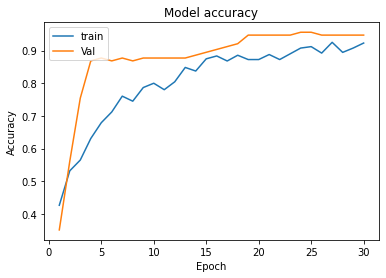

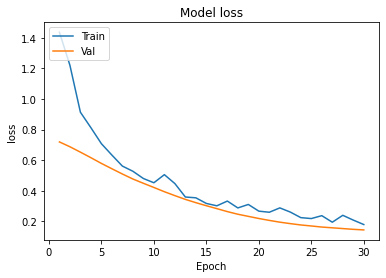

In [49]:
plot_learningCurve(history, epochs) #model is not overfitting, which is obvious from the lower val accuracy compared to loss accuracy